# Lab | Random Forests

### Instructions
- Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
- Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [1]:
import pandas as pd
import numpy as np

numerical   = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
target      = pd.read_csv('./files_for_lab/target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [2]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [3]:
display(numerical.shape)
categorical.shape

(95412, 315)

(95412, 22)

In [4]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [5]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [6]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

For simplicity, I will OneHot Encode only CLUSTER and DATASRCE.
All other categorical fields with integer type will be ordinally encoded by scaling alongside the numericals.

In [7]:
categorical['CLUSTER'] = categorical['CLUSTER'].astype(object)
categorical['DATASRCE'] = categorical['DATASRCE'].astype(object)

In [8]:
numerical.isna().sum().sum()

0

In [9]:
categorical.isna().sum().sum()

0

So data is clean, but we have not chosen features or scaled/encoded the data.

In [10]:
y = target['TARGET_B']
X = pd.concat([numerical, categorical], axis=1)

### Upscaling, encoding and scaling data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [12]:
train = pd.concat([X_train, y_train], axis=1) # recombine for sampling

train_0 = train[train['TARGET_B']==0]
train_1 = train[train['TARGET_B']==1]

display(train_0.shape)
train_1.shape              # heavily imbalanced dataset

(72452, 338)

(3877, 338)

In [13]:
from sklearn.utils import resample

train_1_oversampled = resample(train_1, replace=True, n_samples = len(train_0))
display(train_0.shape)
train_1_oversampled.shape

(72452, 338)

(72452, 338)

In [14]:
train_upsampled = pd.concat([train_0, train_1_oversampled], axis=0)

# and to randomise the rows I will use .sample(frac = 1)
# although I will do this again indirectly through encoding/scaling later:

train_upsampled = train_upsampled.sample(frac=1)

display(train_upsampled.shape)
train_upsampled.head()

# note the TARGET_B column on right is not ordered

(144904, 338)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
607,1,43.0,4,1,2,0,5,23,20,9,...,1,91,10,94,4,95,10,91,3,1
33504,1,94.0,3,3,5,0,39,39,17,21,...,2,87,7,95,12,96,11,87,7,0
16069,0,72.0,5,9,0,0,49,37,51,24,...,1,90,2,95,5,95,10,90,2,0
67629,0,88.0,5,5,25,0,0,0,0,0,...,1,90,11,95,12,95,12,90,9,0
29591,2,54.0,6,9,1,0,33,24,30,15,...,1,96,3,93,12,96,3,93,1,0


In [15]:
# I will now reassign X_train and y_train to be based off this upsampled dataset

X_train = train_upsampled.drop('TARGET_B', axis=1)
y_train = train_upsampled['TARGET_B']

display(X_train.head())
y_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
607,1,43.0,4,1,2,0,5,23,20,9,...,55,1,91,10,94,4,95,10,91,3
33504,1,94.0,3,3,5,0,39,39,17,21,...,31,2,87,7,95,12,96,11,87,7
16069,0,72.0,5,9,0,0,49,37,51,24,...,26,1,90,2,95,5,95,10,90,2
67629,0,88.0,5,5,25,0,0,0,0,0,...,10,1,90,11,95,12,95,12,90,9
29591,2,54.0,6,9,1,0,33,24,30,15,...,44,1,96,3,93,12,96,3,93,1


607      1
33504    0
16069    0
67629    0
29591    0
Name: TARGET_B, dtype: int64

In [16]:
X_train_num = X_train.select_dtypes(np.number).copy()
X_test_num = X_test.select_dtypes(np.number).copy()
X_train_cat = X_train.select_dtypes(object).copy()
X_test_cat = X_test.select_dtypes(object).copy()

display(X_train_cat.shape)
# expect only 9 (not 22) columns now as we will ordinally encode the integer categorical columns with numericals

display(X_train_cat.head())
y_train.head()

(144904, 9)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
607,CA,9,H,M,3,L,F,A,U
33504,NC,27,U,M,1,L,F,C,C
16069,CA,35,H,F,2,L,F,A,T
67629,CA,40,H,F,3,L,F,C,R
29591,other,35,H,F,3,L,D,C,T


607      1
33504    0
16069    0
67629    0
29591    0
Name: TARGET_B, dtype: int64

The numericals do not need to be scaled for Decision Tree / Random Forest models, but for feature selection later on it will be easier if the dataset has been scaled.

I will scale the data now (fit only on the train dataset) and then remove the same columns from both later on for feature selection.

I will use the train set also to determine the features to drop / keep.

In [17]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) # fit only on the training set, but applied to both train and test (below)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)

display(X_train_scaled.describe().T)
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TCODE,144904.0,0.000937,0.015572,0.0,0.000000,0.000014,0.000028,1.0
AGE,144904.0,0.627236,0.145545,0.0,0.536082,0.624862,0.731959,1.0
INCOME,144904.0,0.531742,0.281470,0.0,0.333333,0.666667,0.666667,1.0
WEALTH1,144904.0,0.787344,0.297289,0.0,0.666667,1.000000,1.000000,1.0
HIT,144904.0,0.014050,0.036265,0.0,0.000000,0.000000,0.012448,1.0
...,...,...,...,...,...,...,...,...
MAXRDATE_MM,144904.0,0.537528,0.363104,0.0,0.181818,0.545455,0.909091,1.0
LASTDATE_YR,144904.0,0.228234,0.271128,0.0,0.000000,0.000000,0.500000,1.0
LASTDATE_MM,144904.0,0.502488,0.389400,0.0,0.090909,0.454545,0.909091,1.0
FIRSTDATE_YR,144904.0,0.948706,0.033563,0.0,0.916667,0.947917,0.979167,1.0


,count,mean,std,min,25%,50%,75%,max
TCODE,19083.0,0.000725,0.012556,0.000000,0.000000,0.000014,0.000028,0.541679
AGE,19083.0,0.624277,0.150293,0.000000,0.525773,0.624862,0.731959,1.000000
INCOME,19083.0,0.523441,0.283671,0.000000,0.333333,0.666667,0.666667,1.000000
WEALTH1,19083.0,0.783891,0.301476,0.000000,0.555556,1.000000,1.000000,1.000000
HIT,19083.0,0.014330,0.043738,0.000000,0.000000,0.000000,0.012448,1.000000
...,...,...,...,...,...,...,...,...
MAXRDATE_MM,19083.0,0.538595,0.362678,0.000000,0.181818,0.545455,0.909091,1.000000
LASTDATE_YR,19083.0,0.209742,0.263734,0.000000,0.000000,0.000000,0.500000,1.000000
LASTDATE_MM,19083.0,0.513003,0.386048,0.000000,0.090909,0.545455,0.909091,1.000000
FIRSTDATE_YR,19083.0,0.951069,0.033097,0.802083,0.916667,0.958333,0.979167,1.000000


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat) # again, fit only on the training set, but applied to both
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

display(X_train_encode.head())
X_test_encode.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
display(y_train.head())
y_test.head()

607      1
33504    0
16069    0
67629    0
29591    0
Name: TARGET_B, dtype: int64

10396    0
77799    0
66629    0
62633    0
83026    0
Name: TARGET_B, dtype: int64

In [20]:
X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

# as row index / labels are no longer aligned with transformed X
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [21]:
display(y_train.head())
y_test.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

In [22]:
y_train.value_counts() # now equal as we upsampled the train_1 data

1    72452
0    72452
Name: TARGET_B, dtype: int64

So entire dataframe is prepared for modelling and feature selection.

#### No features have been removed at this stage.

### First Random Forest Classifier Model RFC

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# for simplicity, I will keep the parameters used in class

RFC = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state=42)

RFC.fit(X_train_transformed, y_train)

RFC_score = RFC.score(X_test_transformed, y_test) # I want this for comparison later

print('Training score: ', RFC.score(X_train_transformed, y_train))
print('Test score: ', RFC_score)

# to visualise the model output

y_pred = RFC.predict(X_test_transformed)
display(confusion_matrix(y_test, y_pred))

Training score:  0.6191064428863248
Test score:  0.6163077084315883


array([[11238,  6879],
       [  443,   523]], dtype=int64)

### Feature Selection

I'll use VarianceThreshold to eliminate columns adding little benefit to the model.

In [24]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02 # arbitrary low value for ALL columns as they are already scaled

sel = VarianceThreshold(threshold=(var_threshold)) # selector

sel = sel.fit(X_train_transformed) # the fit calculates the variance for each column

temp = sel.transform(X_train_transformed) # the transform removes the low variance columns
temp = pd.DataFrame(temp)

print(X_train_transformed.shape)
print(temp.shape)     # we will drop 276 columns using this threshold

(144904, 406)
(144904, 130)


In [25]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.432990,0.500000,0.111111,0.232323,0.202020,0.111111,1.000000,0.0,0.000000,0.525253,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.958763,0.333333,0.333333,0.393939,0.171717,0.333333,1.000000,0.0,0.000000,0.252525,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.731959,0.666667,1.000000,0.373737,0.515152,1.000000,1.000000,0.0,0.000000,0.969697,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.896907,0.666667,0.555556,0.000000,0.000000,0.555556,0.949495,0.0,0.060606,0.787879,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.546392,0.833333,1.000000,0.242424,0.303030,0.888889,0.000000,1.0,0.000000,0.939394,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# list of all features
# FALSE to be dropped, TRUE to be kept

list(zip(X_train_transformed.columns, list(sel.get_support())))

[('TCODE', False),
 ('AGE', True),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MALEMILI', False),
 ('MALEVET', False),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH13', False),
 ('ETH14', False),
 ('ETH15', False),
 ('ETH16', False),
 ('AGE901', False),
 ('AGE902', False),
 ('AGE903', False),
 ('AGE904', False),
 ('AGE905', False),
 ('AGE906', False),
 ('AGE907', False),
 ('CHIL1', False),
 ('CHIL2', False),
 ('CHIL3', False),
 ('AGEC1', False),
 ('AGEC2', False),
 ('AGEC3', False),
 ('AGEC4', False),
 ('AGEC5', F

In [27]:
col_drop = [col[0] for col in zip(X_train_transformed.columns, list(sel.get_support())) if col[1] == False]
col_drop

['TCODE',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'DMA',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC1

I will drop these columns from my X_train_transformed and X_test_transformed datasets and rerun the RandomForest model.

I do not need to rescale / encode the data.

But I do need to fit a new model to the new train dataframe as the columns have changed, I also have to do this for test or the model can't read the testset.

In [28]:
X_train_dropped = X_train_transformed.drop(col_drop, axis=1)
X_test_dropped = X_test_transformed.drop(col_drop, axis=1)
X_train_dropped.shape

### Second Random Forest Classifier Model RFC2

In [29]:
RFC2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state=42)

RFC2.fit(X_train_dropped, y_train)

RFC2_score = RFC2.score(X_test_dropped, y_test) # I want this for comparison later

print('Training score: ', RFC2.score(X_train_dropped, y_train))
print('Test score: ', RFC2_score)

# to visualise the model output

y_pred2 = RFC2.predict(X_test_dropped)
display(confusion_matrix(y_test, y_pred2))

Training score:  0.6195964224590074
Test score:  0.6086569197715244


array([[11069,  7048],
       [  420,   546]], dtype=int64)

In [30]:
print('Original RFC score: ', RFC_score)
print('New RFC score: ', RFC2_score)

Original RFC score:  0.6163077084315883
New RFC score:  0.6086569197715244


It hasn't significantly changed the model as we have only removed the features that contributed very little. I would ahve expected a slight improvement as removed noise but it hasn't changed much.

### Feature Selection II

Now I'll try choosing only the "best" features rather than just removing the worst.

I'll use SelectKBest to take only the top 20 features.

Again, I'll identify these using the training dataset.

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(chi2, k=20).fit_transform(X_train_transformed, y_train)

selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.080808,0.046512,0.050505,0.161616,0.383838,0.919192,0.969697,0.030303,0.585859,0.046610,0.195122,0.000000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.757576,0.372093,0.414141,0.000000,0.040404,0.121212,0.212121,0.000000,0.020202,0.025424,0.121951,0.000000,0.285714,0.5,0.0,0.0,0.0,0.0,1.0,0.0
2,0.010101,0.000000,0.010101,0.636364,0.929293,1.000000,1.000000,0.030303,0.838384,0.021186,0.073171,0.333333,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.000000,0.060606,0.131313,0.656566,0.898990,0.020202,0.303030,0.050847,0.170732,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.000000,0.040404,0.090909,0.343434,0.646465,0.000000,0.434343,0.038136,0.048780,1.000000,0.714286,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# To check the individual scores of the top 30 features
# (more than we will choose)

model = SelectKBest(chi2, k=20).fit(X_train_transformed, y_train)

df = pd.DataFrame(data = model.scores_, columns = ['score'])

df['Column'] = X_train_transformed.columns

print(df.sort_values(by = ['score'], ascending = False).head(30))

           score       Column
313  1347.534499       RFA_2F
398   874.609328     RFA_2A_G
396   547.864701     RFA_2A_E
324   371.887065  LASTDATE_YR
397   349.217594     RFA_2A_F
305   203.242300     CARDGIFT
111   183.893091         HVP2
110   182.040538         HVP1
112   174.372741         HVP3
115   123.924708         HVP6
113   120.843860         HVP4
22    111.304738         ETH2
361   103.821922   CLUSTER_24
378    85.892032   CLUSTER_41
316    83.882165    ODATEW_YR
129    81.035408          RP1
367    77.872507   CLUSTER_30
107    77.230351        ETHC4
304    66.100534     NGIFTALL
108    65.503371        ETHC5
325    62.346632  LASTDATE_MM
315    62.322061     DOMAIN_B
83     61.934970          HV1
84     61.153745          HV2
391    61.035890   HOMEOWNR_U
130    60.515939          RP2
319    60.332716       DOB_MM
299    55.654434     CARDPROM
345    55.462729    CLUSTER_8
377    55.039139   CLUSTER_40


Let's check for colinearity between these. I'll consider the top 30 features in case we need to remove any:

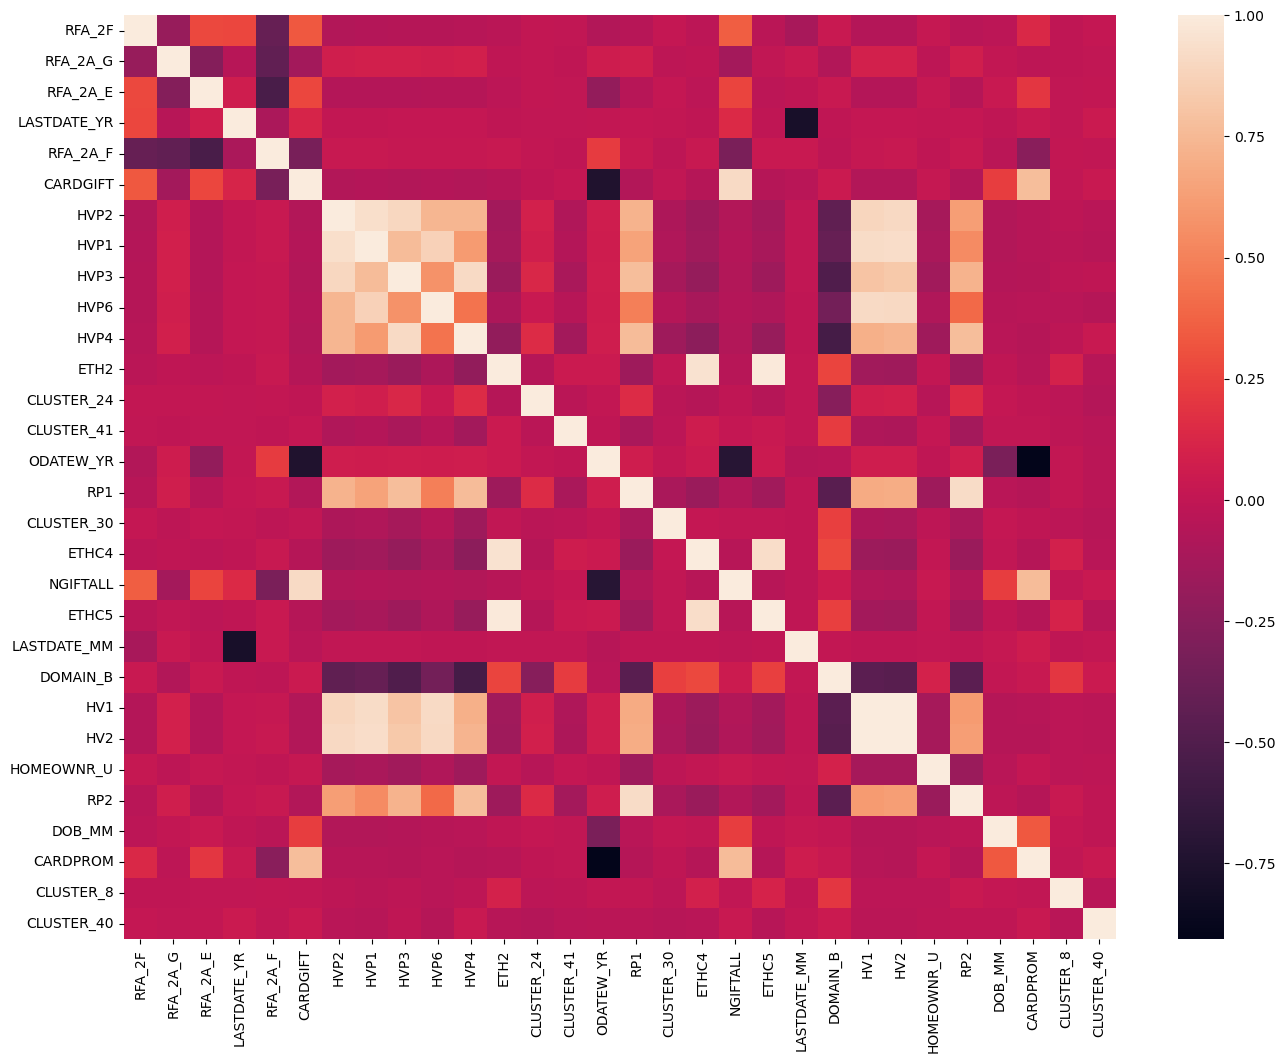

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']

corr_matrix=X_train_transformed[cols].corr(method='pearson')
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix)
plt.show()

Can see colinearity between features.

I will not include the following:
- HVP3
- HVP1
- ETHC4
- HV1
- HV2
- RP2

So I'll use RFA_2F through to NUMPROM excluding those six.

In [34]:
cols = list(df.sort_values(by = ['score'], ascending = False).head(26)['Column'])

cols.remove('HVP3')
cols.remove('HVP1')
cols.remove('ETHC4')
cols.remove('HV1')
cols.remove('HV2')
cols.remove('RP2')

display(len(cols))
cols

20

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'LASTDATE_YR',
 'RFA_2A_F',
 'CARDGIFT',
 'HVP2',
 'HVP6',
 'HVP4',
 'ETH2',
 'CLUSTER_24',
 'CLUSTER_41',
 'ODATEW_YR',
 'RP1',
 'CLUSTER_30',
 'NGIFTALL',
 'ETHC5',
 'LASTDATE_MM',
 'DOMAIN_B',
 'HOMEOWNR_U']

In [35]:
X_train_top = X_train_transformed[cols]
X_test_top = X_test_transformed[cols]
X_train_top

,RFA_2F,RFA_2A_G,RFA_2A_E,LASTDATE_YR,RFA_2A_F,CARDGIFT,HVP2,HVP6,HVP4,ETH2,CLUSTER_24,CLUSTER_41,ODATEW_YR,RP1,CLUSTER_30,NGIFTALL,ETHC5,LASTDATE_MM,DOMAIN_B,HOMEOWNR_U
0,0.000000,0.0,0.0,0.0,1.0,0.195122,0.383838,0.030303,0.969697,0.080808,0.0,0.0,0.571429,0.585859,0.0,0.046610,0.050505,0.818182,0.666667,0.0
1,0.000000,0.0,0.0,0.5,1.0,0.121951,0.040404,0.000000,0.212121,0.757576,0.0,0.0,0.285714,0.020202,0.0,0.025424,0.414141,0.909091,0.333333,1.0
2,0.333333,0.0,0.0,0.0,1.0,0.073171,0.929293,0.030303,1.000000,0.010101,0.0,0.0,0.500000,0.838384,0.0,0.021186,0.010101,0.818182,0.000000,0.0
3,0.000000,0.0,0.0,0.0,1.0,0.170732,0.131313,0.020202,0.898990,0.000000,0.0,0.0,0.500000,0.303030,0.0,0.050847,0.000000,1.000000,0.333333,0.0
4,1.000000,0.0,0.0,0.5,0.0,0.048780,0.090909,0.000000,0.646465,0.000000,0.0,0.0,0.714286,0.434343,0.0,0.038136,0.000000,0.181818,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144899,0.333333,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.030303,0.606061,0.0,0.0,0.857143,0.000000,0.0,0.008475,0.373737,0.909091,0.666667,0.0
144900,0.000000,0.0,0.0,0.5,1.0,0.243902,0.020202,0.000000,0.131313,0.050505,0.0,0.0,0.214286,0.010101,0.0,0.076271,0.030303,0.272727,0.333333,1.0
144901,1.000000,0.0,1.0,0.5,0.0,0.219512,0.626263,0.121212,0.979798,0.020202,0.0,0.0,0.357143,0.989899,0.0,0.050847,0.020202,0.000000,0.000000,0.0
144902,0.000000,0.0,0.0,0.0,1.0,0.073171,0.939394,0.020202,1.000000,0.030303,0.0,0.0,0.642857,0.323232,0.0,0.021186,0.010101,0.363636,0.333333,0.0


### Third Random Forest Classifier Model RFC3

In [36]:
RFC3 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state=42)

RFC3.fit(X_train_top, y_train)

RFC3_score = RFC3.score(X_test_top, y_test) # I want this for comparison later

print('Training score: ', RFC3.score(X_train_top, y_train))
print('Test score: ', RFC3_score)

# to visualise the model output

y_pred3 = RFC3.predict(X_test_top)
display(confusion_matrix(y_test, y_pred3))

Training score:  0.6054422238171479
Test score:  0.6006917151391291


array([[10925,  7192],
       [  428,   538]], dtype=int64)

In [37]:
print('Original RFC score: ', RFC_score)
print('Second RFC score:   ', RFC2_score)
print('Top20 RFC score:    ', RFC3_score)

Original RFC score:  0.6163077084315883
Second RFC score:    0.6086569197715244
Top20 RFC score:     0.6006917151391291


This hasn't significantly improved the model either, perhaps as we have removed useful information gained from lower-scored features.